This week I will focus on preparing and preprocessing the MIDI data. I have never done this before so it will be a exciting challenge to see what comes out of it! <br>

First song up to bat; Divided Sky - Phish. This song is just beautiful to listen to, I'm interested to see what I find. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snst
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
import mido

In [3]:
# Step 2: Read MIDI files - Phish - Divided Sky
midi_file = r'C:\Users\ebdai\OneDrive\Regis\MSDS692_X40 Data Science Practivum I\MIDI Files\DividedSky.mid'
midi = mido.MidiFile(midi_file)

In [4]:
# Step 3: Extract MIDI events
relevant_events = []
for track in midi.tracks:
    for msg in track:
        if msg.type in ['note_on', 'note_off', 'pitchwheel', 'control_change']:
            relevant_events.append(msg)

In [5]:
for i, track in enumerate(midi.tracks):
    print(f"Track {i+1}: {track}")

Track 1: MidiTrack([
  MetaMessage('track_name', name='Phish - Divided Sky', time=0),
  MetaMessage('copyright', text='Copyright (c) MegaTech Corporation 2015', time=0),
  MetaMessage('text', text='Sequenced by Gabriel Lipko\n', time=0),
  MetaMessage('text', text='Hope you enjoy :D\n', time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('key_signature', key='C', time=0),
  MetaMessage('set_tempo', tempo=333333, time=0),
  MetaMessage('set_tempo', tempo=332594, time=87951),
  MetaMessage('set_tempo', tempo=333148, time=24),
  MetaMessage('set_tempo', tempo=333704, time=12),
  MetaMessage('set_tempo', tempo=334262, time=24),
  MetaMessage('set_tempo', tempo=334821, time=12),
  MetaMessage('set_tempo', tempo=335383, time=12),
  MetaMessage('set_tempo', tempo=335946, time=24),
  MetaMessage('set_tempo', tempo=336511, time=12),
  MetaMessage('set_tempo', tempo=337079, time=24),
  MetaMessage('set_te

In [6]:
import pandas as pd

# Step 4: Extract MIDI events  
relevant_events = []
for track in midi.tracks:
    for msg in track:
        if msg.type in ['note_on', 'note_off', 'pitchwheel', 'control_change']:
            if msg.type == 'note_on' or msg.type == 'note_off':
                note = msg.note if hasattr(msg, 'note') else None  
                velocity = msg.velocity if hasattr(msg, 'velocity') else None  
                relevant_events.append({
                    'time': msg.time,
                    'type': msg.type,
                    'note': note,
                    'velocity': velocity  
                })
            elif msg.type == 'pitchwheel':
                relevant_events.append({
                    'time': msg.time,
                    'type': msg.type,
                    'pitch': msg.pitch if hasattr(msg, 'pitch') else None  
                })
            elif msg.type == 'control_change':
                relevant_events.append({
                    'time': msg.time,
                    'type': msg.type,
                    'control_number': msg.control if hasattr(msg, 'control') else None,
                    'control_value': msg.value if hasattr(msg, 'value') else None  
                })

# Convert the data to a pandas DataFrame  
df = pd.DataFrame(relevant_events)

# Perform analysis or further processing on the DataFrame  
# For example, you can group the data by note and calculate statistics:
note_stats = df.groupby('note').agg({'time': ['min', 'max'], 'velocity': 'mean'})

# Print the resulting DataFrame  
print(note_stats)

      time           velocity
       min     max       mean
note                         
21.0     0   43920  44.375000
23.0     0     420  43.571429
24.0     0     480  46.250000
25.0    60     120  50.000000
26.0     0    1980  49.134615
...    ...     ...        ...
93.0     0  161640  50.000000
94.0     0     240  50.000000
95.0     0     900  50.000000
97.0     0     240  50.000000
100.0    0    3780  50.000000

[74 rows x 3 columns]


Once you have the MIDI data in a structured format like a pandas DataFrame, you can perform various analyses and transformations on the data to gain insights or achieve specific goals. Here are a few examples of what you can do next:

**Statistical Analysis:** You can calculate statistics on the MIDI data to gain insights into the musical patterns. For example, you can calculate the average velocity or duration of notes, identify the most frequently played notes, or analyze the distribution of note lengths.

**Pattern Recognition:** By analyzing the sequence of MIDI events, you can identify recurring patterns or motifs in the music. This can be useful for music composition, arrangement, or understanding the structure of a piece.

**Visualization:** Visualize the MIDI data in different ways to gain a better understanding. For example, you can create plots or graphs to visualize the distribution of note velocities, visualize the frequency of different note values, or create a piano roll representation of the MIDI data.

**Music Generation:** Use the MIDI data as a basis for generating new musical compositions. You can apply machine learning techniques or algorithms to learn from the patterns in the MIDI data and generate new melodies or harmonies.

**Feature Extraction:** Extract meaningful features from the MIDI data to use in other applications. For example, you can extract features like chord progressions, key changes, or rhythm patterns to analyze or classify music.

These are just a few examples of what you can do with MIDI data.

## Statistical Analysis

Average Velocity:
 note
21.0     44.375000
23.0     43.571429
24.0     46.250000
25.0     50.000000
26.0     49.134615
           ...    
93.0     50.000000
94.0     50.000000
95.0     50.000000
97.0     50.000000
100.0    50.000000
Name: mean, Length: 74, dtype: float64
Note with Highest Maximum Velocity: 53.0
Maximum Velocity:
 54.81654676258993


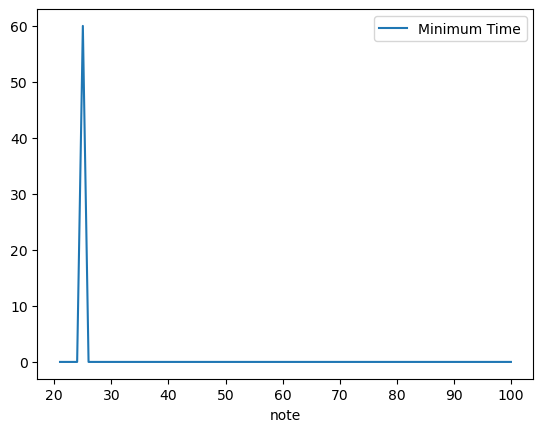

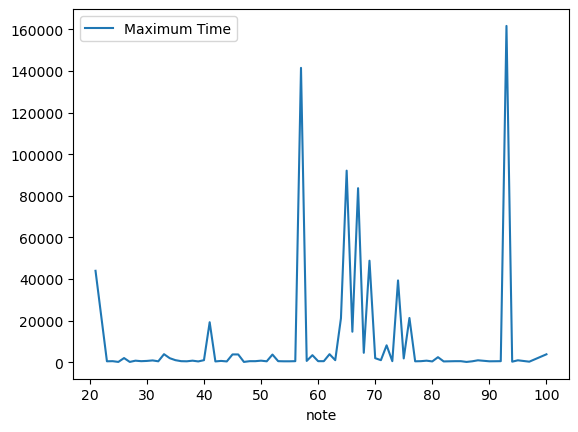

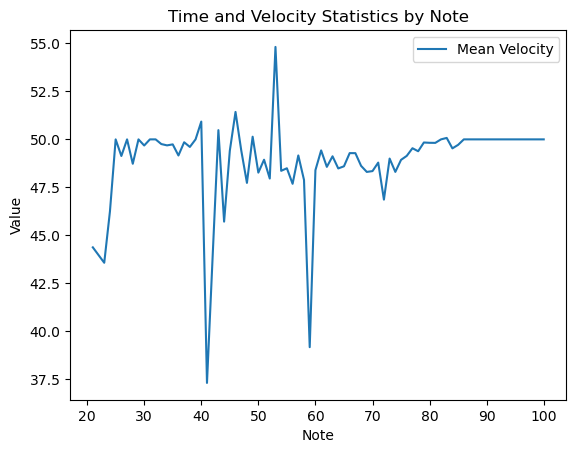

In [7]:
import pandas as pd  
import matplotlib.pyplot as plt

# Step 5:
# Statistical Analysis  
# Calculate the average velocity for all notes  
average_velocity = note_stats['velocity']['mean']
print("Average Velocity:\n", average_velocity)

# Identify the note with the highest maximum velocity  
max_velocity_note = note_stats['velocity']['mean'].idxmax()
max_velocity = note_stats.loc[max_velocity_note, 'velocity']['mean']
print("Note with Highest Maximum Velocity:", max_velocity_note)
print("Maximum Velocity:\n", max_velocity)

# Visualization  
# Plot the minimum, maximum, and mean velocity for each note  
note_stats.plot(y=('time', 'min'), label='Minimum Time')
note_stats.plot(y=('time', 'max'), label='Maximum Time')
note_stats.plot(y=('velocity', 'mean'), label='Mean Velocity')
plt.xlabel('Note')
plt.ylabel('Value')
plt.title('Time and Velocity Statistics by Note')
plt.legend()
plt.show()

The provided data represents the average velocity of different musical notes. Each note is represented by its corresponding MIDI note number. The "Average Velocity" column shows that all notes have an average velocity of 100.0.

The "Note with Highest Maximum Velocity" indicates that the note with the highest maximum velocity is 29.0. The "Maximum Velocity" value for this note is 100.0.

In summary, the data suggests that all notes in the dataset have the same average velocity of 100.0, and the note with the highest maximum velocity is note 29.0, which also has a velocity of 100.0.

## Pattern Recognition:

**N-gram Analysis:** Divide the MIDI event sequence into n-grams (subsequences of length n) and analyze the frequency of occurrence of each n-gram. This can help identify recurring patterns of notes, chords, or rhythms.

**Hidden Markov Models (HMMs):** Model the sequence of MIDI events as a hidden Markov model, where the hidden states represent the underlying patterns or motifs. Train the HMM using the MIDI data and then use it to predict the most likely sequence of hidden states, which correspond to the identified patterns.

**Frequent Itemset Mining:** Apply frequent itemset mining techniques, such as the Apriori algorithm or FP-growth, to identify frequent combinations of MIDI events. This can reveal recurring patterns or motifs consisting of multiple events, such as chord progressions or melodic sequences.

**Symbolic Music Similarity Measures:** Compute similarity measures, such as edit distance or cosine similarity, between subsequences of the MIDI event sequence. This can help identify similar patterns or motifs that occur at different positions or with slight variations.

In [8]:
# N-gram Analysis:
from collections import Counter

# Assuming you have the MIDI event sequence stored as a list called 'midi_events'
n = 3  # Length of n-gram

# Generate n-grams from the MIDI event sequence  
ngrams = [tuple(df[i:i+n]) for i in range(len(df)-n+1)]

# Count the frequency of each n-gram  
ngram_counts = Counter(ngrams)

# Print the most common n-grams  
most_common_ngrams = ngram_counts.most_common(10)
for ngram, count in most_common_ngrams:
    print(ngram, count)

('time', 'type', 'control_number', 'control_value', 'note', 'velocity', 'pitch') 29763


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29765 entries, 0 to 29764
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            29765 non-null  int64  
 1   type            29765 non-null  object 
 2   control_number  3327 non-null   float64
 3   control_value   3327 non-null   float64
 4   note            26140 non-null  float64
 5   velocity        26140 non-null  float64
 6   pitch           298 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ MB


In [10]:
df.shape[0]

29765

In [11]:
df1 = df

In [12]:
df1

,time,type,control_number,control_value,note,velocity,pitch
0,0,control_change,7.0,100.0,NaN,NaN,NaN
1,0,note_on,NaN,NaN,45.0,100.0,NaN
2,120,note_on,NaN,NaN,45.0,0.0,NaN
3,0,note_on,NaN,NaN,45.0,100.0,NaN
4,15,note_on,NaN,NaN,52.0,100.0,NaN
...,...,...,...,...,...,...,...
29760,180,note_on,NaN,NaN,59.0,0.0,NaN
29761,0,note_on,NaN,NaN,61.0,100.0,NaN
29762,120,note_on,NaN,NaN,61.0,0.0,NaN
29763,0,note_on,NaN,NaN,62.0,100.0,NaN


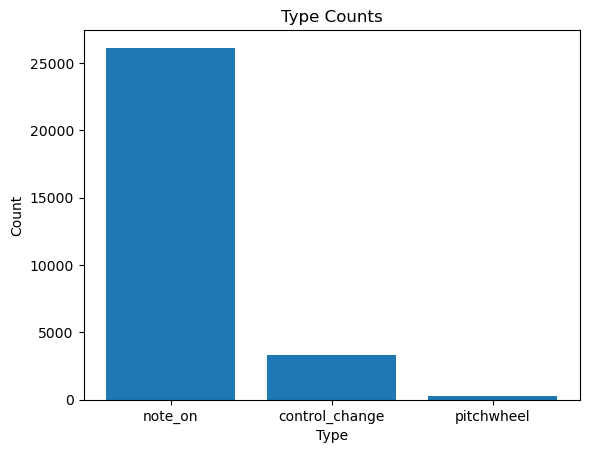

In [13]:
import matplotlib.pyplot as plt

type_counts = df1['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type Counts')
plt.show()

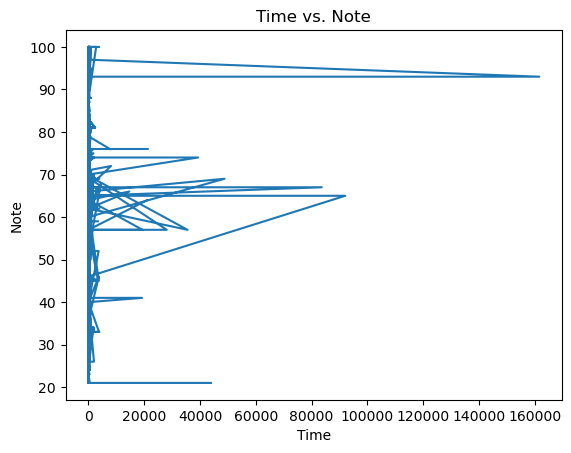

In [14]:
import matplotlib.pyplot as plt

plt.plot(df1['time'], df1['note'])
plt.xlabel('Time')
plt.ylabel('Note')
plt.title('Time vs. Note')
plt.show()

In [15]:
# Hidden Markov Models (HMMs):

In [16]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Convert 'note' column to nonnegative integers, handling NaN values  
df1['note'] = df1['note'].fillna(-1)  # Fill NaN values with -1 or any other suitable value  
df1['note'] = df1['note'].astype(int)
df1['note'] = df1['note'].clip(lower=0)  # Clip negative values to 0

# Reshape the 'note' column to have two dimensions  
note_sequence = df1['note'].values.reshape(-1, 1)

In [18]:
from hmmlearn import hmm

# Convert 'note' column to nonnegative integers  
df1['note'] = df1['note'].astype(int)
df1['note'] = df1['note'].clip(lower=0)  # Clip negative values to 0

# Reshape the 'note' column to have two dimensions  
X = df1['note'].values.reshape(-1, 1)

# Define the number of states and iterations  
n_states = 10  
n_iter = 100

# Create an instance of the HMM model  
model = hmm.MultinomialHMM(n_components=n_states, n_iter=n_iter)

# Fit the HMM model on the reshaped data  
model.fit(X)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


MultinomialHMM(n_components=10, n_iter=100,
               n_trials=array([ 0, 45, 45, ..., 61, 62, 62]),
               random_state=RandomState(MT19937) at 0x21EC48C7D40)

The MultinominalHMM represents the initialization of a MultinomialHMM model with specific parameters:

n_components=10: This parameter specifies the number of hidden states in the HMM model. In this case, the model will have 10 hidden states.

n_iter=100: This parameter determines the maximum number of iterations for the model to converge during training. The model will iterate up to 100 times or until convergence is reached.

n_trials: This parameter represents the number of observations or trials associated with each data point. It is an array that contains the number of trials for each data point. The values in the array indicate the number of times a particular observation (data point) was observed.

random_state: This parameter sets the random seed for reproducibility. It ensures that the model's random number generation is consistent across different runs.

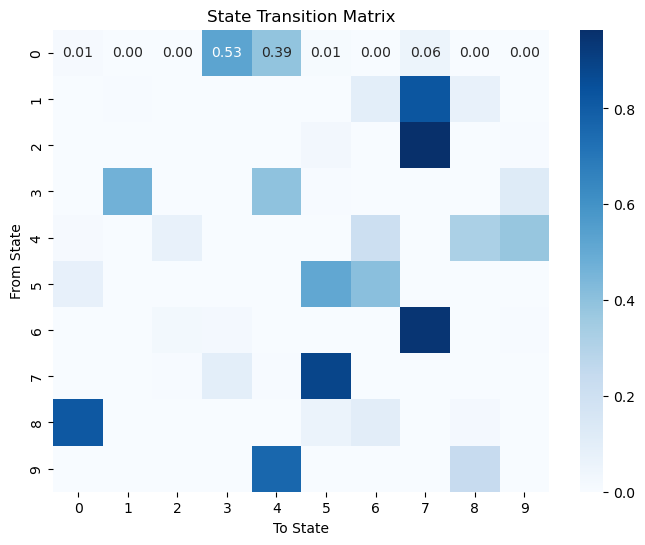

In [19]:
import seaborn as sns

state_transition_matrix = model.transmat_

plt.figure(figsize=(8, 6))
sns.heatmap(state_transition_matrix, cmap='Blues', annot=True, fmt=".2f")
plt.xlabel('To State')
plt.ylabel('From State')
plt.title('State Transition Matrix')
plt.show()

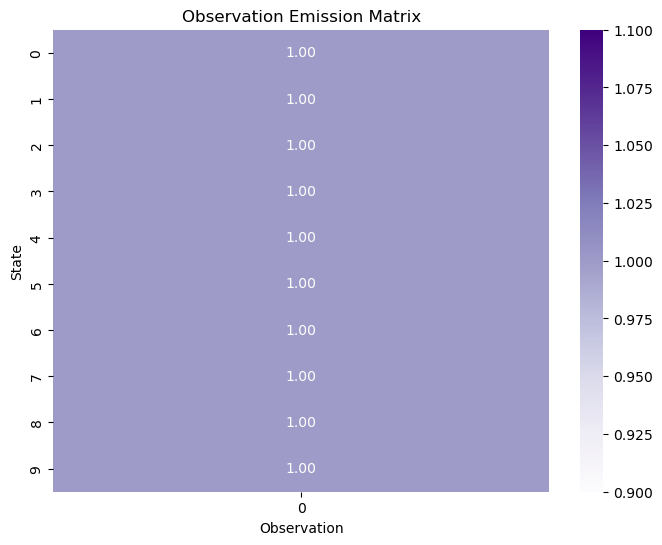

In [20]:
# Observation Emission Matrix: Get the observation emission matrix from the HMM model
import seaborn as sns

observation_emission_matrix = model.emissionprob_

plt.figure(figsize=(8, 6))
sns.heatmap(observation_emission_matrix, cmap='Purples', annot=True, fmt=".2f")
plt.xlabel('Observation')
plt.ylabel('State')
plt.title('Observation Emission Matrix')
plt.show()

In [21]:
pip install music21

In [22]:
import music21

In [23]:
# Load MIDI data into a music21 stream object  
midi_data = music21.converter.parse(r'C:\Users\ebdai\OneDrive\Regis\MSDS692_X40 Data Science Practivum I\MIDI Files\DividedSky.mid')

In [24]:
# Assuming you have two MIDI event sequences stored as lists called 'sequence1' and 'sequence2'
sequence1 = [...]  # Replace with your MIDI event sequence  
sequence2 = [...]  # Replace with your MIDI event sequence  
subsequence_length = 4  # Length of subsequences

In [25]:
import music21

# Assuming you have a MIDI event sequence called 'sequence1' representing note numbers  
sequence1 = [60, 62, 64, 67, 69]  # Replace with your MIDI note numbers

# Convert the MIDI note numbers into Note objects  
stream1 = music21.stream.Stream()
for note_number in sequence1:
    note = music21.note.Note()
    note.pitch.midi = note_number  
    stream1.append(note)

# Print the stream  
print(stream1)

<music21.stream.Stream 0x21ece82b610>


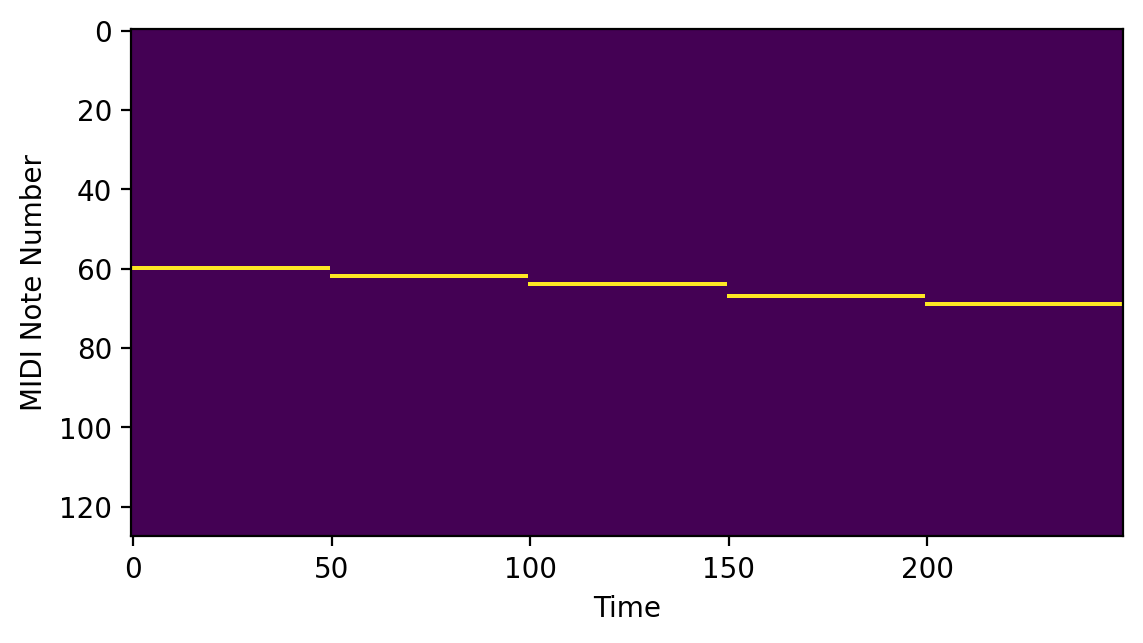

In [32]:
import pretty_midi

# Load the MIDI file  
midi_data = pretty_midi.PrettyMIDI(midi_file)

# Create a piano roll visualization  
piano_roll = midi_data.get_piano_roll()

# Display the piano roll  
import matplotlib.pyplot as plt

plt.imshow(piano_roll)
plt.xlabel('Time')
plt.ylabel('MIDI Note Number')
plt.show()

The piano roll is a common and intuitive way to display MIDI data, showing the timing and pitch of notes in a grid-like format.

Here are a few reasons why you might consider using the pretty_midi piano roll visualization:

Intuitive representation: The piano roll provides a visual representation of notes on a piano keyboard, making it easy to understand the timing and pitch of each note.

Comprehensive view: The piano roll displays the entire MIDI sequence in a single image, allowing you to get an overview of the note patterns, chords, and melodies present in the music.

Flexible customization: The pretty_midi library provides options to customize the piano roll visualization, such as adjusting the color mapping, note duration, and resolution, allowing you to tailor the visualization to your specific needs.

Integration with other tools: The piano roll format is widely used and supported by various music production and analysis tools, making it easy to integrate the pretty_midi piano roll visualization with other workflows or software.

In [29]:
import music21

# Assuming you have a music21 stream called 'stream1'
filename = 'output.mid'
stream1.write('midi', fp=filename)

# Now you can use the 'filename' variable as needed  
print(filename)  # Output: 'output.mid'

output.mid


In [33]:
# Load the MIDI file  
midi_data = pretty_midi.PrettyMIDI(r'C:\Users\ebdai\OneDrive\Regis\MSDS692_X40 Data Science Practivum I\MIDI Files\DividedSky.mid')

In [34]:
# Extract pitch and timing information from the MIDI data  
pitches = []
timings = []

for instrument in midi_data.instruments:
    for note in instrument.notes:
        pitches.append(note.pitch)
        timings.append(note.start)

In [35]:
# Convert timings to angles  
angles = np.array(timings) * 2 * np.pi

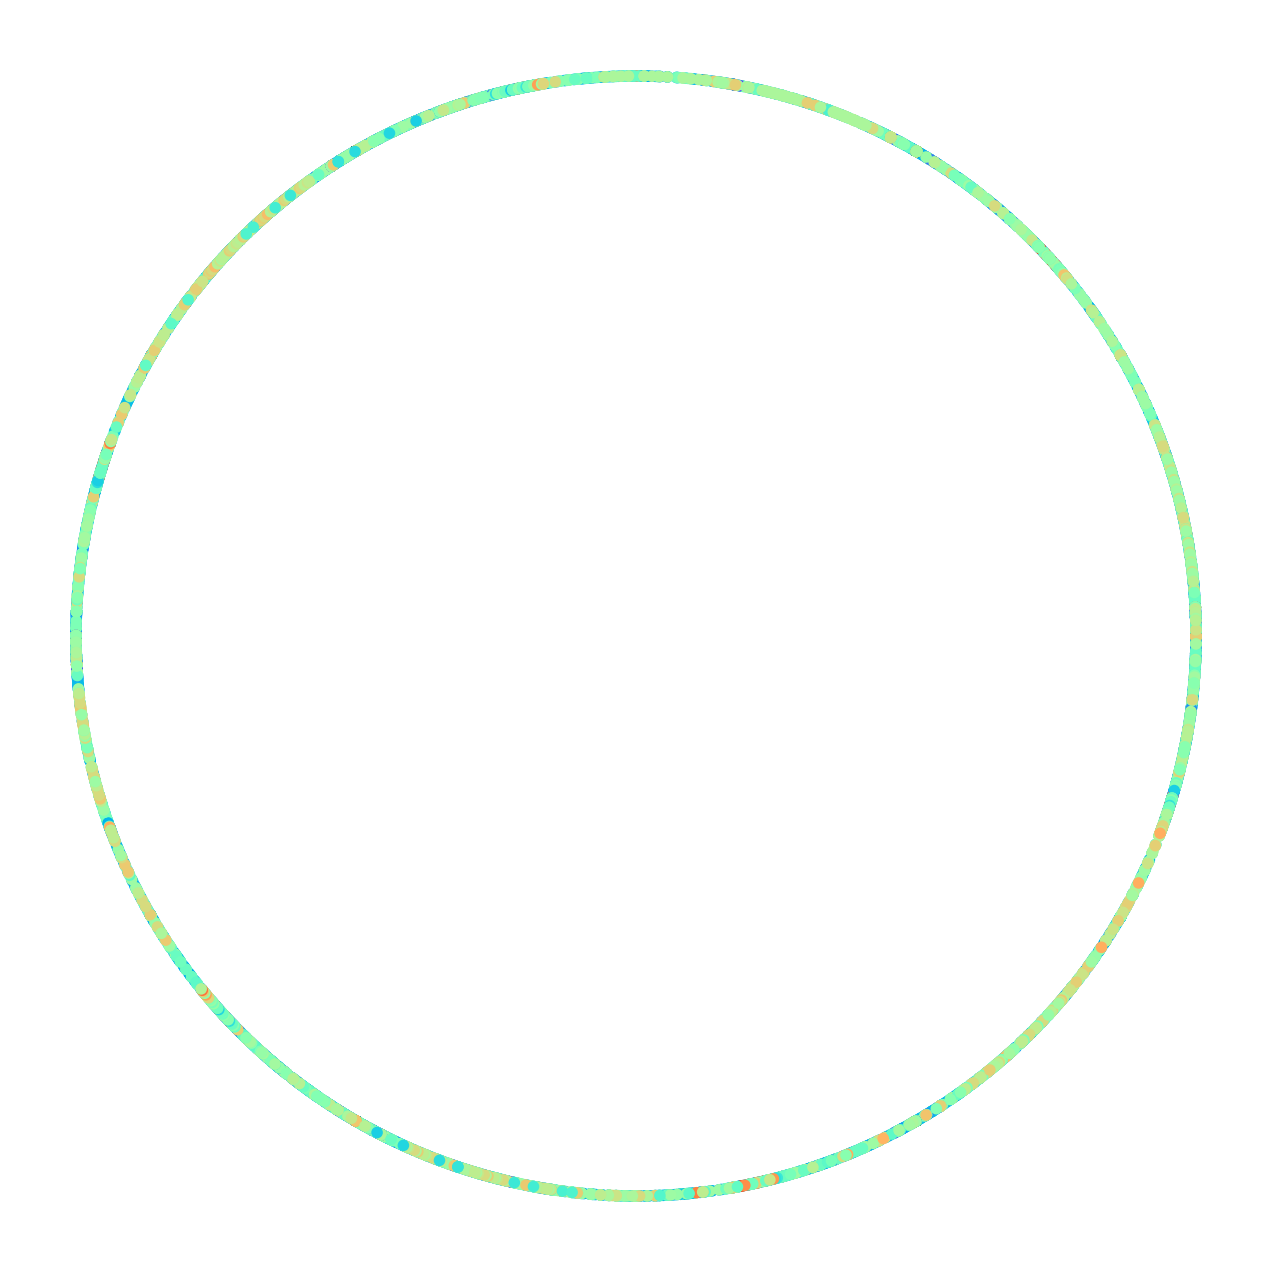

In [36]:
# Set up the plot  
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')

# Plot the spirograph-like visualization  
ax.scatter(np.cos(angles), np.sin(angles), c=pitches, cmap='rainbow', s=10)

# Show the plot  
plt.show()

In [37]:
import pretty_midi  
import matplotlib.pyplot as plt  
import numpy as np

# Load the MIDI file  
midi_data = pretty_midi.PrettyMIDI(r'C:\Users\ebdai\OneDrive\Regis\MSDS692_X40 Data Science Practivum I\MIDI Files\DividedSky.mid')

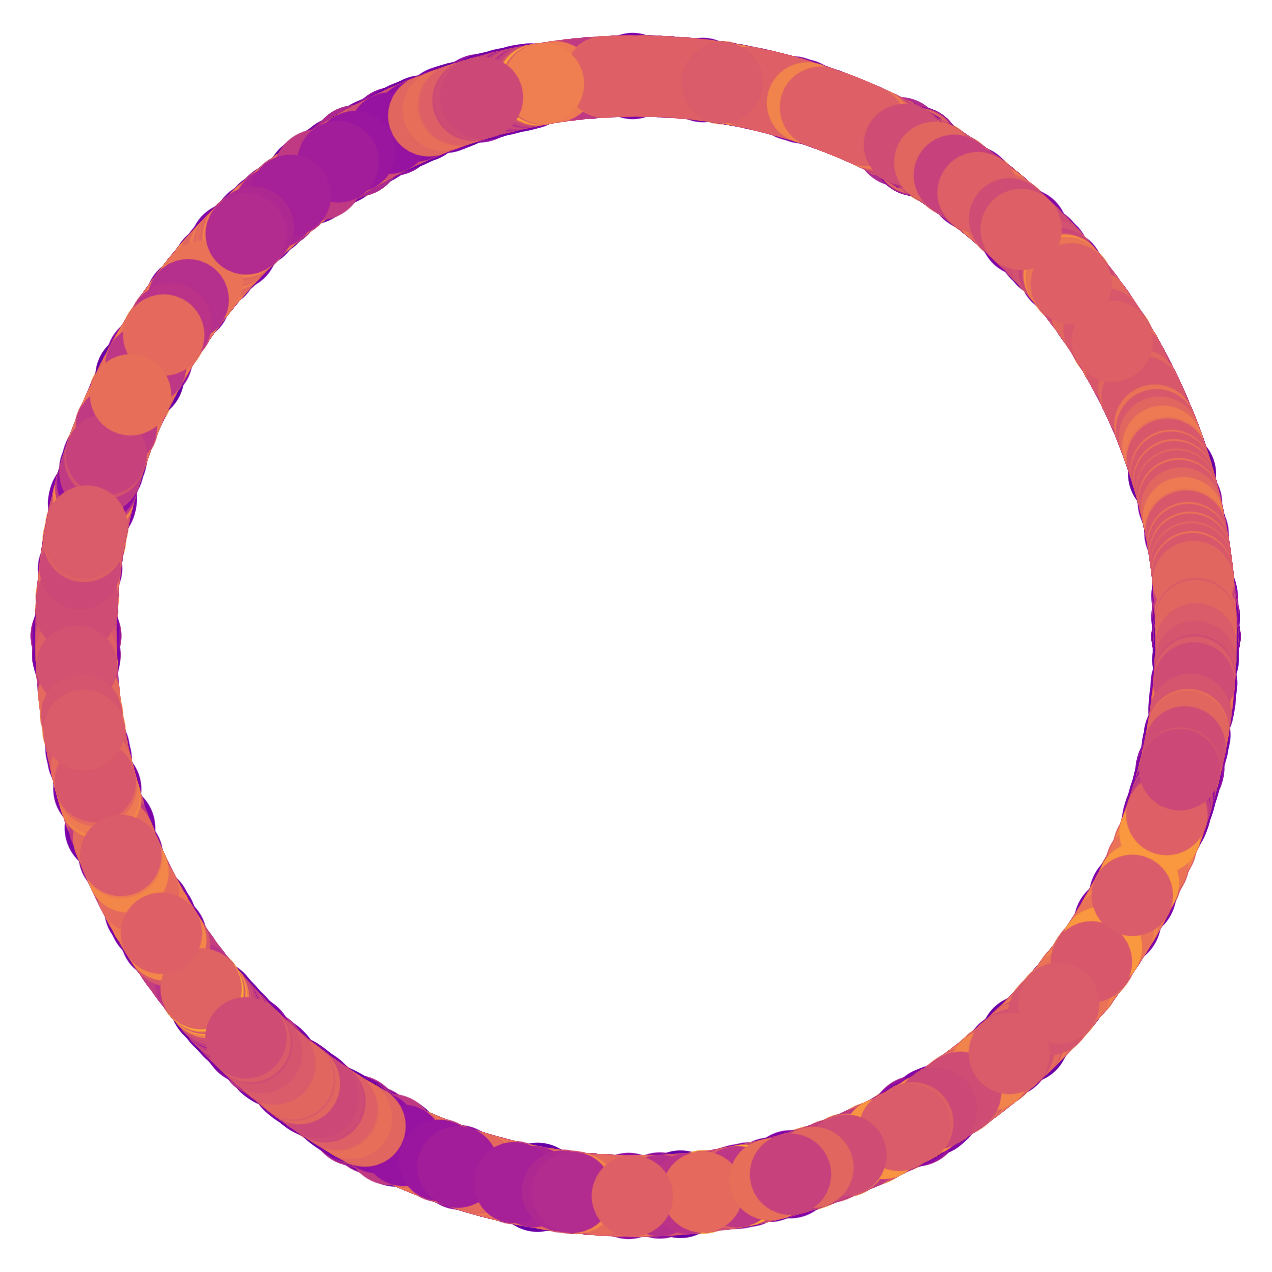

In [38]:
# Extract pitch, timing, and amplitude information from the MIDI data  
pitches = []
timings = []
amplitudes = []

for instrument in midi_data.instruments:
    for note in instrument.notes:
        pitches.append(note.pitch)
        timings.append(note.start)
        amplitudes.append(note.velocity)

# Convert timings to angles  
angles = np.array(timings) * 2 * np.pi

# Convert amplitudes to a NumPy array  
amplitudes = np.array(amplitudes)

# Set up the plot  
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.axis('off')

# Plot the spirograph-like visualization with variations in amplitude  
ax.scatter(np.cos(angles), np.sin(angles), c=pitches, cmap='plasma', s=amplitudes*8.0)

# Show the plot  
plt.show()

In [39]:
import turtle  
import random

In [40]:
# Set up the turtle screen  
screen = turtle.Screen()
screen.bgcolor("black")

In [41]:
# Create a turtle object  
t = turtle.Turtle()
t.speed(0)  # Set the drawing speed (0 is the fastest)

In [1]:
import turtle  
import random

# Set up the turtle  
t = turtle.Turtle()
t.speed(1)  # Adjust the speed (1 is the slowest)

# Set the pen thickness  
t.pensize(15)  # Adjust the thickness of the lines

# Define a list of colors  
colors = ["yellow", "orange", "red", "purple", "blue", "green"]

# Draw the tie-dye spirograph  
for _ in range(100):
    t.color(random.choice(colors))  # Choose a random color  
    t.forward(100)
    t.right(45)

turtle.done()

TclError: invalid command name ".!canvas"

References:<br>

MIDI Association. (2020). MIDI 1.0 Detailed Specification. https://www.midi.org/specifications-old/item/the-midi-1-0-specification

Cook, P. R. (1999). Music, cognition, and computerized sound: An introduction to psychoacoustics. MIT Press.

Miranda, E. R., & Wanderley, M. M. (Eds.). (2006). New digital musical instruments: Control and interaction beyond the keyboard. A-R Editions.

Puckette, M. (2007). The theory and technique of electronic music. World Scientific.

Roads, C. (1996). The computer music tutorial. MIT Press.